In [10]:
from pymatgen.ext.matproj import MPRester

mp_API_key = '7WeId8uaz60cHZ2s'
mp_cryst = 'mp-9124'

with MPRester(mp_API_key) as m:
    pbandstruct = m.get_phonon_bandstructure_by_material_id(mp_cryst)

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



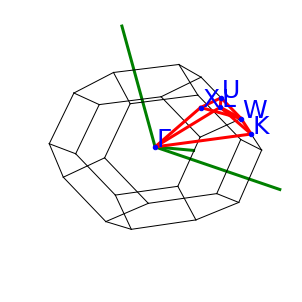

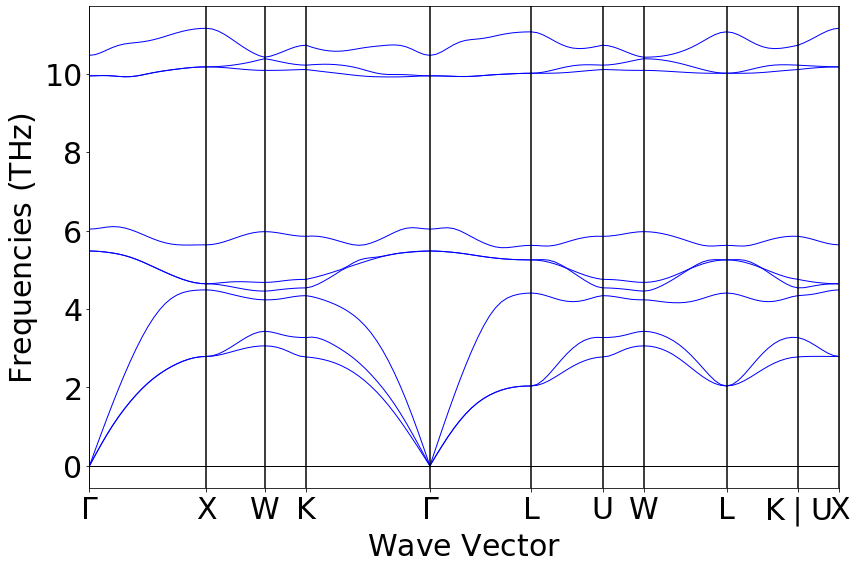

In [11]:
from pymatgen.phonon.plotter import * 
import matplotlib.pyplot as plt
import numpy as np

PhononBSPlotter(pbandstruct).plot_brillouin() #1st Brillouin zone
PhononBSPlotter(pbandstruct).get_plot()       #phonon band-structure

#extract additionnal data from the plot
data = PhononBSPlotter(pbandstruct).bs_plot_data()
freqs = data['frequency']
ticks = data['ticks']
dists = data['distances']

# Vitesse du son

Avant de chercher la vitesse du son, il faut chercher où regarder. 
Les bandes accoustiques sont des chemins de bord de zone (de Brillouin) où la fréquence des phonons atteint 0 à l'une de ses extremités (donc des "coins" de la 1e zone de Brillouin).

Dans notre cas, on remarque que ces bandes sont $\Gamma - X$, $K - \Gamma$ et $\Gamma - L$.

Dans ces bandes, la vitesse du son est déterminée par $v_s = \frac{\partial \omega}{\partial q}$ où $\omega$ est la relation de dispersion de notre matériau et $q$ notre vecteur d'onde dans le réseau réciproque.
On peut partir sur l'hypothèse que $\lambda >> a$ ($a$ notre paramètre de maille) ce qui garanti une relation linéaire entre $\omega$ et $q$.

In [37]:
def speed_of_sound(band, i, istart, iend):
    df = (freqs[band][i][istart] - freqs[band][i][iend]) * 1e12 #THz -> Hz
    dp = (dists[band][istart]    - dists[band][iend])    * 1e10 #A-1 -> m-1
    
    return 2*np.pi*abs(df/dp)

def plot_speed(band, i, istart, iend, color):
    plt.plot([dists[band][istart],dists[band][istart]+dists[band][iend]-dists[band][istart]],[freqs[band][i][istart],freqs[band][i][istart]+freqs[band][i][iend]-freqs[band][i][istart]], color=color, lw=3)
    
speeds = [
    [0, 2, 6, 0],
    [3, 0, 13, -1],
    [4, 2, 7, 0]
]

colors = ['tab:green', 'gold', 'red']

# Première bande: $\Gamma - X$

In [38]:
print(f'Vitesse du son dans la bande Gamma - X (en vert): {speed_of_sound(*speeds[0]):.3f}m/s')

Vitesse du son dans la bande Gamma - X (2e courbe): 4561.464m/s


# Deuxième bande: $K - \Gamma$

In [39]:
print(f'Vitesse du son dans la bande K - Gamma (en jaune): {speed_of_sound(*speeds[1]):.3f}m/s')

Vitesse du son dans la bande K - Gamma (1e courbe): 2498.033m/s


# Troisième bande: $\Gamma - L$

In [40]:
print(f'Vitesse du son dans la bande Gamma - L (en rouge): {speed_of_sound(*speeds[2]):.3f}m/s')

Vitesse du son dans la bande Gamma - L (2e courbe): 4814.381m/s


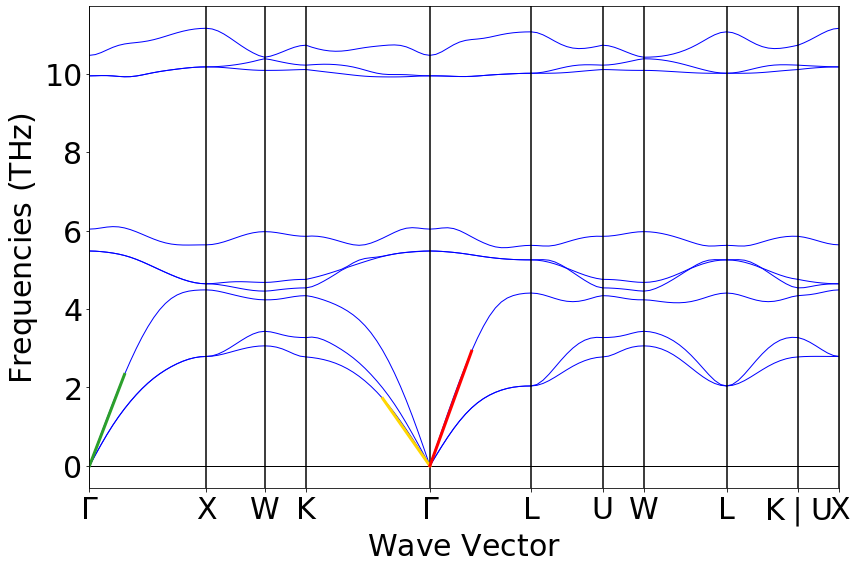

In [41]:
PhononBSPlotter(pbandstruct).get_plot()

for speed, color in zip(speeds, colors):
    plot_speed(*speed, color)


Les résultats (vitesse en m/s) semblent cohérents avec les graphes des courbes. Par exemple, la vitesse la plus grande correspond bien à la pente la plus élevée.

De plus, on se rend compte que les vitesses du son dans le matériau sont bien plus élevées que dans l'air ($\approx$ 1.2km/s) mais plus petite que dans le diamant ($\approx$ 12km/s), ce qui vérifie nos ordres de grandeur.